# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('bank-full.csv', sep=';')

In [23]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [24]:
df.shape

(45211, 17)

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [27]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [30]:
df1= df[['default','housing', 'loan']].replace({'no': 0, 'yes': 1})

In [31]:
df1

,default,housing,loan
0,0,1,0
1,0,1,0
2,0,1,1
3,0,1,0
4,0,0,0
...,...,...,...
45206,0,0,0
45207,0,0,0
45208,0,0,0
45209,0,0,0


In [36]:
df2 = df.drop(['default','housing', 'loan'], axis=1)

In [51]:
df2.head(25)

,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,231,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,447,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,2,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,121,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,593,unknown,5,may,55,1,-1,0,unknown,no


In [42]:
df_row =pd.concat([df1, df2], axis=1)

In [52]:
df_row.head(25)

,default,housing,loan,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,1,0,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown,no
1,0,1,0,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown,no
2,0,1,1,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown,no
3,0,1,0,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown,no
4,0,0,0,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown,no
5,0,1,0,35,management,married,tertiary,231,unknown,5,may,139,1,-1,0,unknown,no
6,0,1,1,28,management,single,tertiary,447,unknown,5,may,217,1,-1,0,unknown,no
7,1,1,0,42,entrepreneur,divorced,tertiary,2,unknown,5,may,380,1,-1,0,unknown,no
8,0,1,0,58,retired,married,primary,121,unknown,5,may,50,1,-1,0,unknown,no
9,0,1,0,43,technician,single,secondary,593,unknown,5,may,55,1,-1,0,unknown,no


In [44]:
df_row.columns

Index(['default', 'housing', 'loan', 'age', 'job', 'marital', 'education',
       'balance', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [45]:
df_row.shape

(45211, 17)

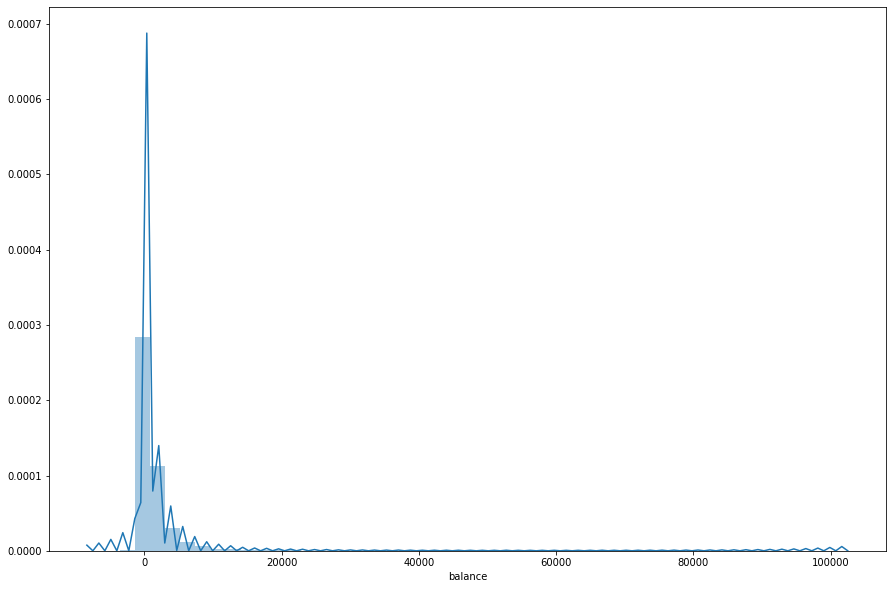

In [46]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_row['balance'])

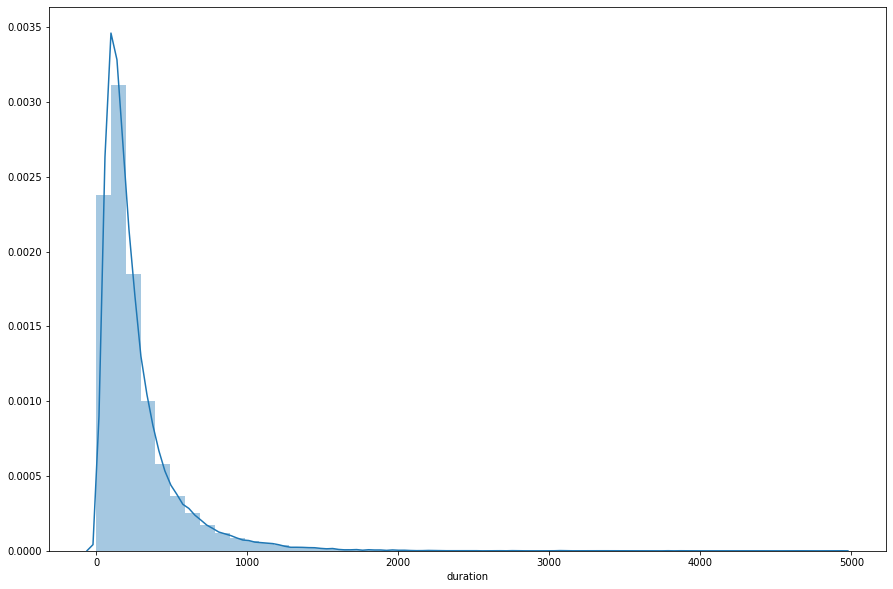

In [47]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_row['duration'])

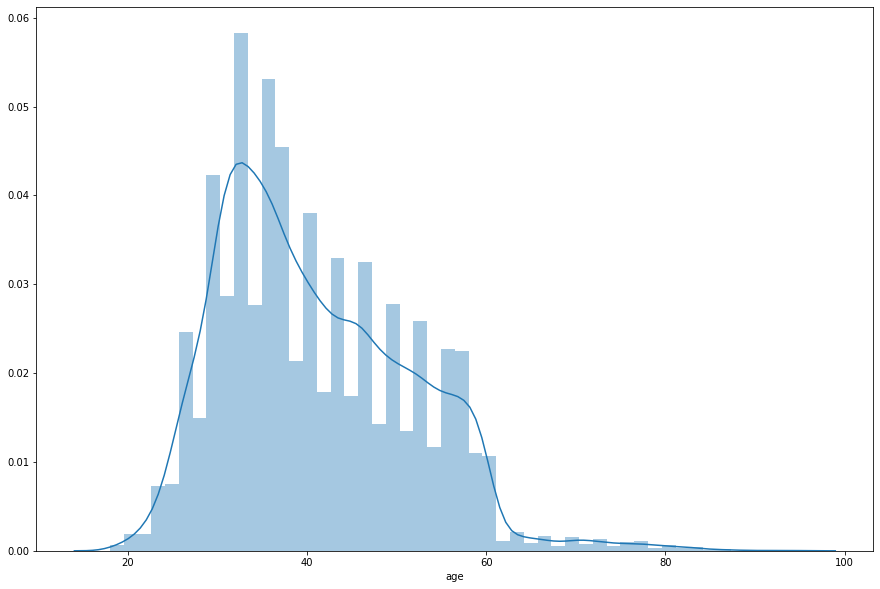

In [48]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_row['age'])

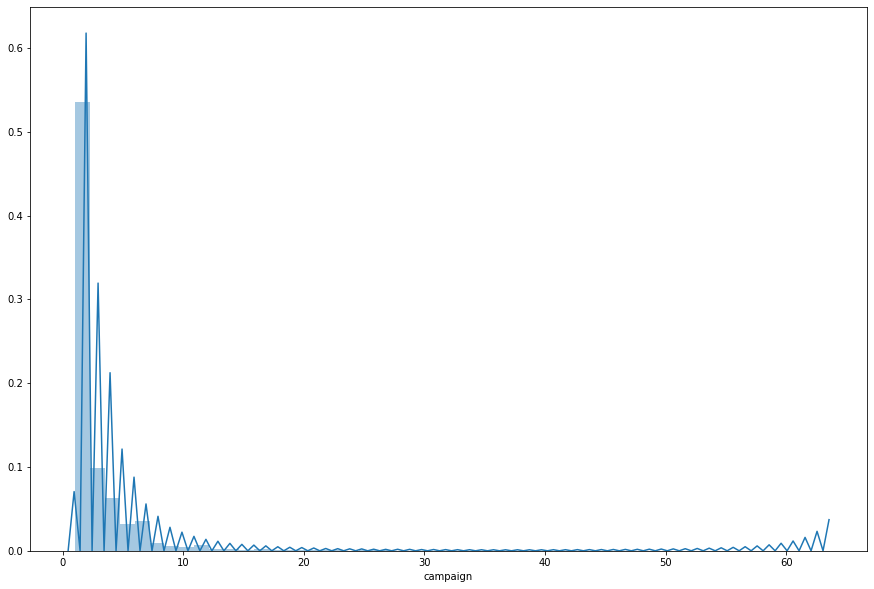

In [50]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_row['campaign'])